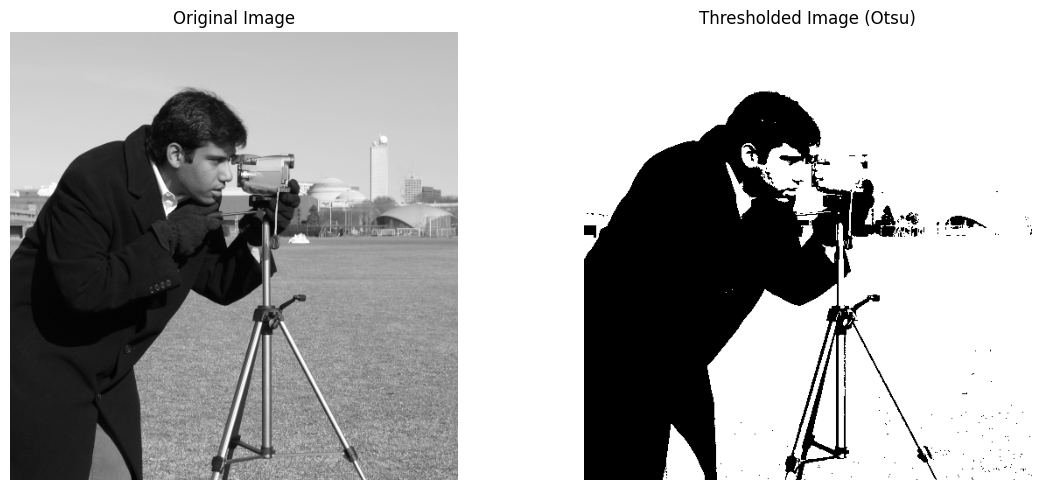

Otsu's Threshold Value: 102

Otsu's thresholding automatically calculates the optimal threshold that maximizes 
the separation between background and foreground (inter-class variance). 
It works well when the image histogram has a clear bimodal distribution.



In [2]:
import matplotlib.pyplot as plt
from skimage import data, filters
import numpy as np

# Load a grayscale image
image = data.camera()

# Apply Otsu's threshold
thresh = filters.threshold_otsu(image)
binary_image = image > thresh

# Display original and thresholded images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap=plt.cm.gray)
axes[1].set_title('Thresholded Image (Otsu)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Analysis of results
print(f"Otsu's Threshold Value: {thresh}")
print("""
Otsu's thresholding automatically calculates the optimal threshold that maximizes
the separation between background and foreground (inter-class variance).
It works well when the image histogram has a clear bimodal distribution.
""")


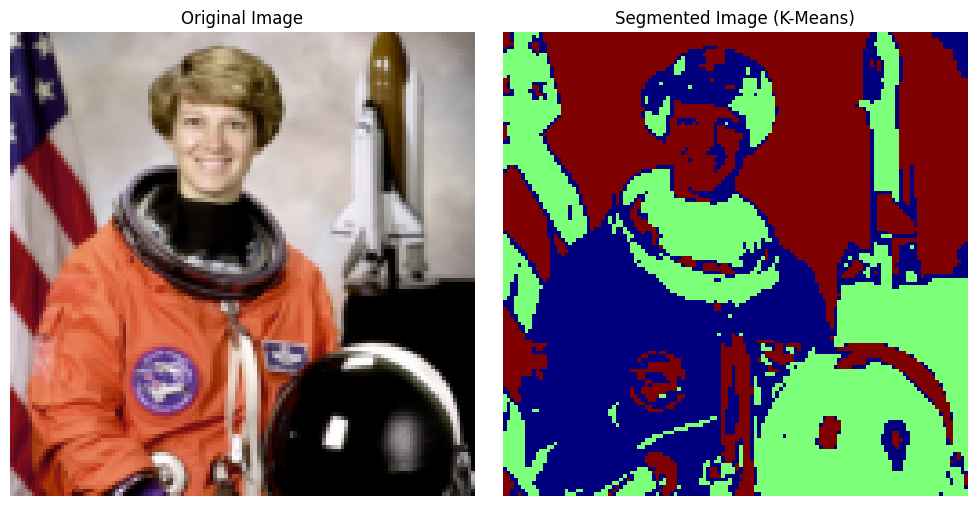


K-Means groups pixels based on their RGB color similarity into k clusters.
This segmentation is unsupervised and does not require labeled data.
The quality depends on color contrast and chosen number of clusters.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data
from skimage.transform import resize

# Load a sample image from skimage and resize for faster processing
image = data.astronaut()
image = resize(image, (128, 128), anti_aliasing=True)  # reduce size for faster clustering

# Convert to 2D array (each row is a pixel, each column is R,G,B)
image_2D = image.reshape((-1, 3))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display original and segmented image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Evaluation of results
print("""
K-Means groups pixels based on their RGB color similarity into k clusters.
This segmentation is unsupervised and does not require labeled data.
The quality depends on color contrast and chosen number of clusters.
""")


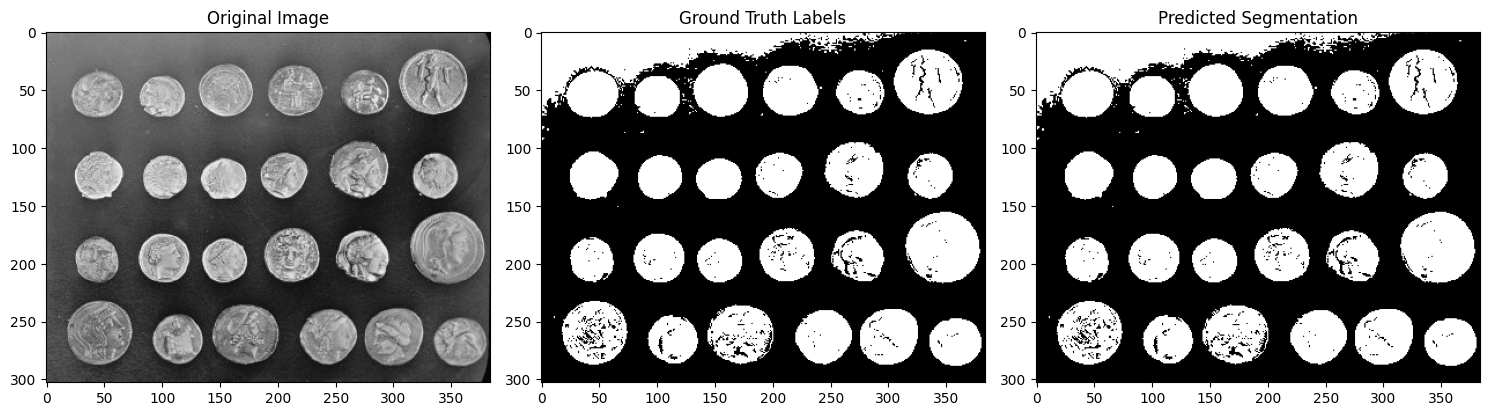

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage import data, filters, segmentation, color
from skimage.util import img_as_ubyte

# Load image
image = img_as_ubyte(data.coins())

# Generate labels using thresholding (simulate ground truth)
threshold = filters.threshold_otsu(image)
labels = (image > threshold).astype(np.uint8)

# Prepare features and labels
h, w = image.shape
X = image.reshape(-1, 1)  # grayscale pixel values
y = labels.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on entire image
predicted_labels = clf.predict(X)
segmented_image = predicted_labels.reshape(h, w)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(labels, cmap='gray')
axes[1].set_title("Ground Truth Labels")
axes[2].imshow(segmented_image, cmap='gray')
axes[2].set_title("Predicted Segmentation")
plt.tight_layout()
plt.show()
